In [8]:
"""_summary_
- this will source the python script 
- the python script has requisite python libraries 
- the class and functions are in the fred-api.py scripts
"""
%run ../scripts/fred-api.py

In [9]:
"""
- remember to got register and get your API key from the website
- 
"""
# fred = FredAPI('your_api_key')
# if you have your api key stored in a json file

with open('../secrets.json', 'r') as file:
    secrets = json.load(file)

api_key = secrets['api_key']    
# 
fredpy = FredPy()


# now the API key
fredpy.set_token(api_key)   

In [10]:
# Example of using the API connector 


bond_yield_df = fredpy.get_series(
    seriesID = 'DGS10', # 10 year Treasury yield
    start = '2000-01-01', #
    end = dt.datetime.now().strftime('%Y-%m-%d'),
    units = 'lin'
)

bond_yield_df['DGS10'] = bond_yield_df['DGS10'].replace('.', np.nan)


# short term yield data

short_term_yield_df = fredpy.get_series(
    seriesID = 'DGS2', # 3 month Treasury yield
    start = '2000-01-01',
    end = dt.datetime.now().strftime('%Y-%m-%d'),
    units = 'lin'
)

short_term_yield_df['DGS2'] = short_term_yield_df['DGS2'].replace('.', np.nan)

short_term_yield_df


# Fed Fund Rate Data 


fed_funds_df = fredpy.get_series(
    seriesID = 'DFF',
    start = '2000-01-01',
    end = dt.datetime.now().strftime('%Y-%m-%d'),
    units = 'lin'
)

fed_funds_df


recessions_df = fredpy.get_series(
    seriesID = 'USRECD',
    start = '2000-01-01',
    end = dt.datetime.now().strftime('%Y-%m-%d'),
    units = 'lin'
)

In [11]:
fed_funds_df

,date,DFF
0,2000-01-01,3.99
1,2000-01-02,3.99
2,2000-01-03,5.43
3,2000-01-04,5.38
4,2000-01-05,5.41
...,...,...
9070,2024-10-31,4.83
9071,2024-11-01,4.83
9072,2024-11-02,4.83
9073,2024-11-03,4.83


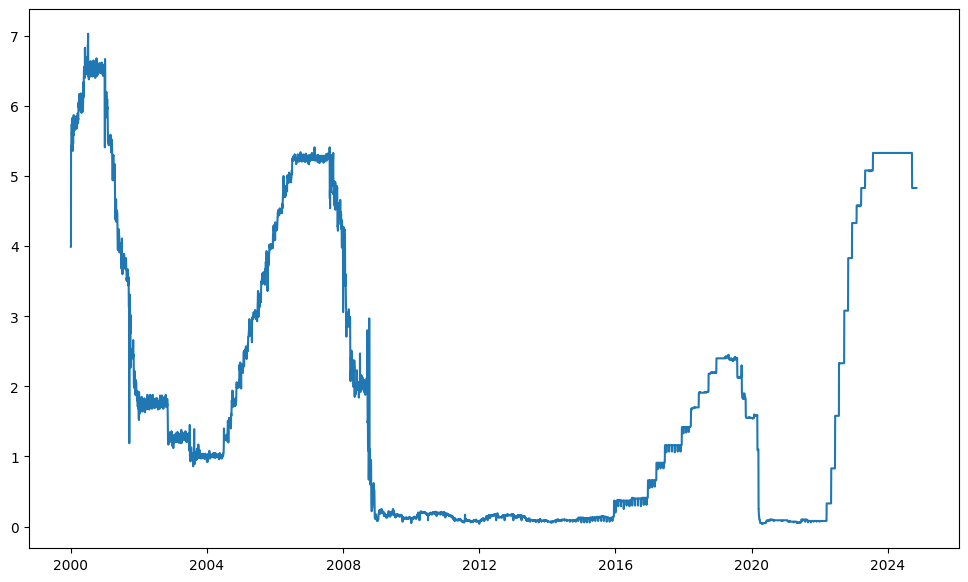

In [12]:
# Graphs 
fig, ax1 = plt.subplots(figsize=(12,7))
ax1.plot(fed_funds_df['date'], fed_funds_df['DFF'], label = "Fed Fund rate")

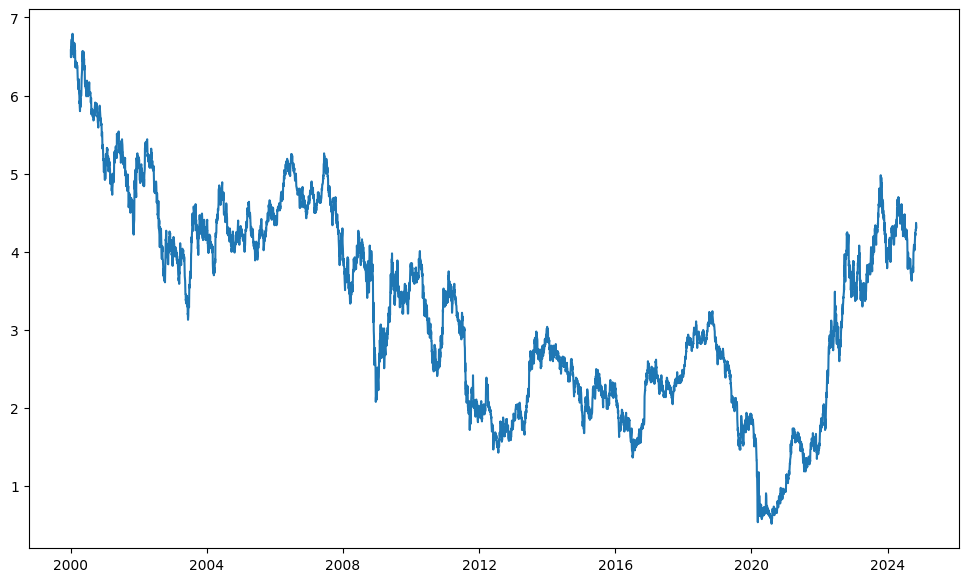

In [13]:
fig, ax1 = plt.subplots(figsize=(12,7))
ax1.plot(bond_yield_df['date'], bond_yield_df['DGS10'], label = "Fed Fund rate")